# UMAP 降维示例
本示例生成带有标签的100维合成向量，首先使用PCA投影到2D进行可视化（代表原始100D数据的粗略2D视图），然后使用UMAP降维到3维，并使用3D散点图进行可视化。

所需库：numpy, scikit-learn, umap-learn, plotly, pandas。如果环境中缺少，请在笔记本中安装它们。

X shape: (400, 100) labels shape: (400,)


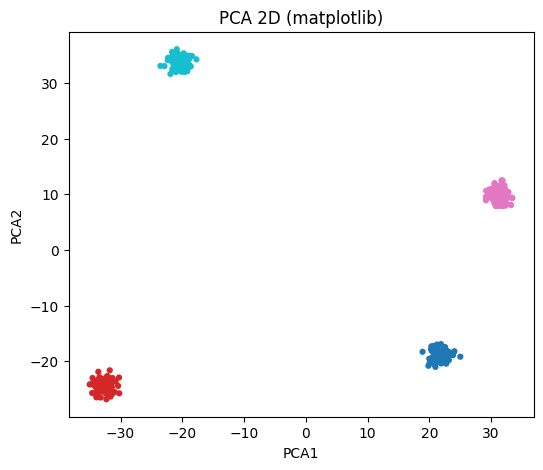

In [11]:
# 如果你需要安装依赖，请取消下一行注释并运行（在 Jupyter 中）：
# !pip install numpy scikit-learn umap-learn plotly pandas

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from umap import UMAP
import plotly.express as px
import matplotlib.pyplot as plt

# 生成合成数据：100 维，2 个簇，每簇 100 个样本（共 200）
rng = np.random.RandomState(42)
n_clusters = 2
n_per_cluster = 100
n_samples = n_clusters * n_per_cluster # 200
n_features = 100
centers = rng.normal(scale=5.0, size=(n_clusters, n_features))  # 2 个中心
X = np.zeros((n_samples, n_features))
y = np.zeros(n_samples, dtype=int)
for i in range(n_clusters):
    start = i * n_per_cluster
    end = start + n_per_cluster
    X[start:end] = centers[i] + rng.normal(scale=1.0, size=(n_per_cluster, n_features))
    y[start:end] = i

print('X shape:', X.shape, 'labels shape:', y.shape)

# 使用 PCA 将 100 维投影到 2D 用作“原始空间的可视化”
pca = PCA(n_components=2, random_state=42)
X_pca2 = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca2, columns=['PCA1','PCA2'])
df_pca['label'] = y.astype(str)

fig = px.scatter(df_pca, x='PCA1', y='PCA2', color='label', title='PCA 2D of 100-d data (for visualization)')
fig.show()

# 也用 matplotlib 简单显示（可选）
plt.figure(figsize=(6,5))
scatter = plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap='tab10', s=12)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA 2D (matplotlib)')
plt.show()

In [12]:
# 使用 UMAP 将数据降到 3 维并使用 Plotly 做 3D 可视化
reducer = UMAP(n_components=3, random_state=42)
X_umap3 = reducer.fit_transform(X)
print('UMAP 3D result shape:', X_umap3.shape)

df_umap = pd.DataFrame(X_umap3, columns=['UMAP1','UMAP2','UMAP3'])
df_umap['label'] = y.astype(str)

fig3d = px.scatter_3d(df_umap, x='UMAP1', y='UMAP2', z='UMAP3', color='label',
                    title='UMAP 3D of 100-d data', width=900, height=700, opacity=0.8)
fig3d.show()

# 如果你想将 UMAP 结果保存为 CSV 以便离线查看：
# df_umap.to_csv('umap_3d_results.csv', index=False)

c:\Users\ke\miniconda3\envs\data_process\lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



UMAP 3D result shape: (400, 3)


原始 100 维向量的余弦相似度矩阵：
[[ 1.         -0.05827004 -0.10914051 -0.01979958  0.96646073]
 [-0.05827004  1.          0.14164557  0.02312537  0.0113769 ]
 [-0.10914051  0.14164557  1.         -0.12747489 -0.06539014]
 [-0.01979958  0.02312537 -0.12747489  1.         -0.01957266]
 [ 0.96646073  0.0113769  -0.06539014 -0.01957266  1.        ]]

UMAP 降维后 3 维向量的余弦相似度矩阵：
[[ 1.          0.29328227  0.24009967 -0.7045516   0.99998933]
 [ 0.29328227  1.         -0.21299523 -0.5804945   0.29490215]
 [ 0.24009967 -0.21299523  0.99999994  0.49416548  0.2435611 ]
 [-0.7045516  -0.5804945   0.49416548  1.0000001  -0.70266634]
 [ 0.99998933  0.29490215  0.2435611  -0.70266634  0.99999994]]

相似度差异矩阵（原始 - UMAP）：
[[4.44089210e-16 3.51552307e-01 3.49240176e-01 6.84751997e-01
  3.35286013e-02]
 [3.51552307e-01 4.44089210e-16 3.54640806e-01 6.03619890e-01
  2.83525251e-01]
 [3.49240176e-01 3.54640806e-01 5.96046450e-08 6.21640370e-01
  3.08951242e-01]
 [6.84751997e-01 6.03619890e-01 6.21640370e-01 1.19209290e-07


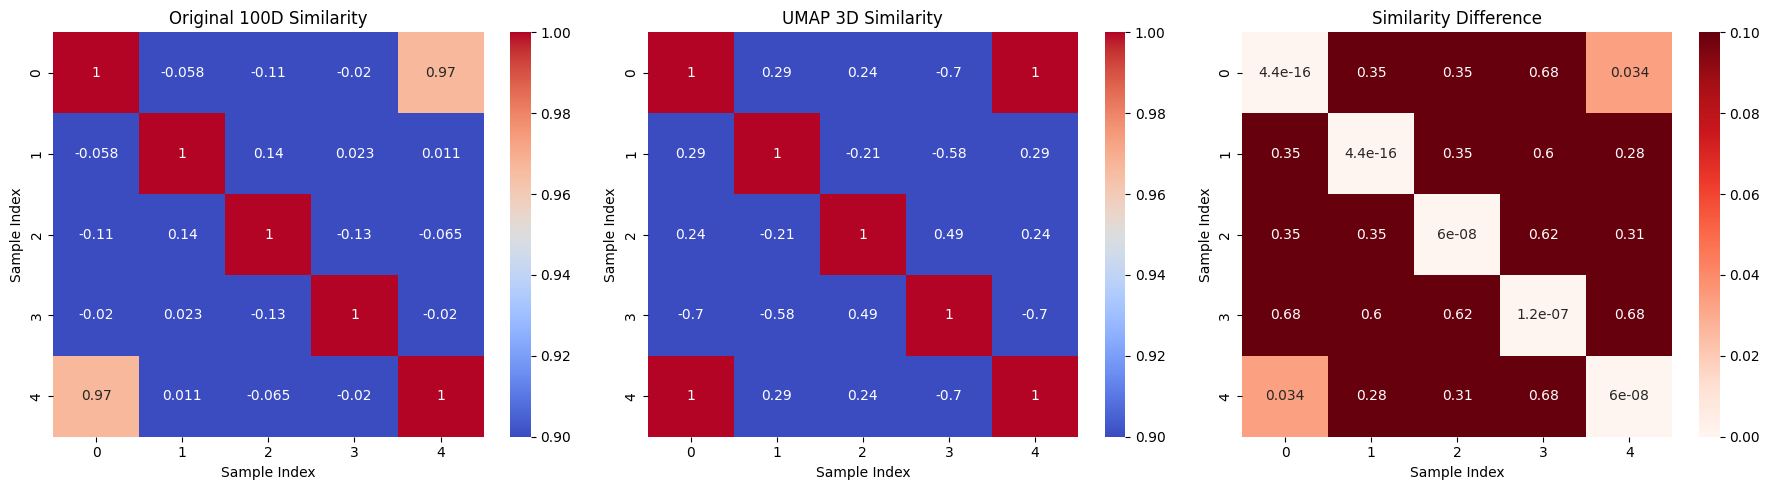

In [15]:
# 计算向量相似度：比较降维前后的余弦相似度
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 随机选择 5 个样本进行比较
sample_indices = rng.choice(n_samples, size=5, replace=False)
X_sample = X[sample_indices]
X_umap_sample = X_umap3[sample_indices]

# 计算原始 100 维向量的余弦相似度
cos_sim_original = cosine_similarity(X_sample)
print("原始 100 维向量的余弦相似度矩阵：")
print(cos_sim_original)

# 计算 UMAP 降维后 3 维向量的余弦相似度
cos_sim_umap = cosine_similarity(X_umap_sample)
print("\nUMAP 降维后 3 维向量的余弦相似度矩阵：")
print(cos_sim_umap)

# 计算相似度差异（绝对差值）
diff = np.abs(cos_sim_original - cos_sim_umap)
print("\n相似度差异矩阵（原始 - UMAP）：")
print(diff)

# 计算平均相似度保留率（对角线为 1，比较非对角线）
avg_diff = np.mean(diff[np.triu_indices_from(diff, k=1)])
print(f"\n平均相似度差异（非对角线）：{avg_diff:.4f}")
print("差异越小，表示降维后相似度保留得越好。")

# 可视化相似度矩阵
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 原始相似度 heatmap
sns.heatmap(cos_sim_original, annot=True, cmap='coolwarm', ax=axes[0], vmin=0.9, vmax=1.0)
axes[0].set_title('Original 100D Similarity')
axes[0].set_xlabel('Sample Index')
axes[0].set_ylabel('Sample Index')

# UMAP 相似度 heatmap
sns.heatmap(cos_sim_umap, annot=True, cmap='coolwarm', ax=axes[1], vmin=0.9, vmax=1.0)
axes[1].set_title('UMAP 3D Similarity')
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Sample Index')

# 差异 heatmap
sns.heatmap(diff, annot=True, cmap='Reds', ax=axes[2], vmin=0, vmax=0.1)
axes[2].set_title('Similarity Difference')
axes[2].set_xlabel('Sample Index')
axes[2].set_ylabel('Sample Index')

plt.tight_layout()
plt.show()

原始 100 维向量的欧几里得距离矩阵：
[[ 0.         73.74835548 73.14896018 16.52049814 75.29208073]
 [73.74835548  0.         64.6961002  72.3810506  66.1060447 ]
 [73.14896018 64.6961002   0.         75.503318   14.09114179]
 [16.52049814 72.3810506  75.503318    0.         78.2283884 ]
 [75.29208073 66.1060447  14.09114179 78.2283884   0.        ]]

UMAP 降维后 3 维向量的欧几里得距离矩阵：
[[ 0.         22.131914   11.604466    1.0256921  11.480636  ]
 [22.131914    0.         25.930159   22.862646   26.121391  ]
 [11.604466   25.930159    0.         11.368368    0.37068063]
 [ 1.0256921  22.862646   11.368368    0.         11.215754  ]
 [11.480636   26.121391    0.37068063 11.215754    0.        ]]

距离差异矩阵（原始 - UMAP）：
[[ 0.         51.61644134 61.54449374 15.49480603 63.81144509]
 [51.61644134  0.         38.76594159 49.5184045  39.9846534 ]
 [61.54449374 38.76594159  0.         64.13494985 13.72046116]
 [15.49480603 49.5184045  64.13494985  0.         67.01263485]
 [63.81144509 39.9846534  13.72046116 67.01263485

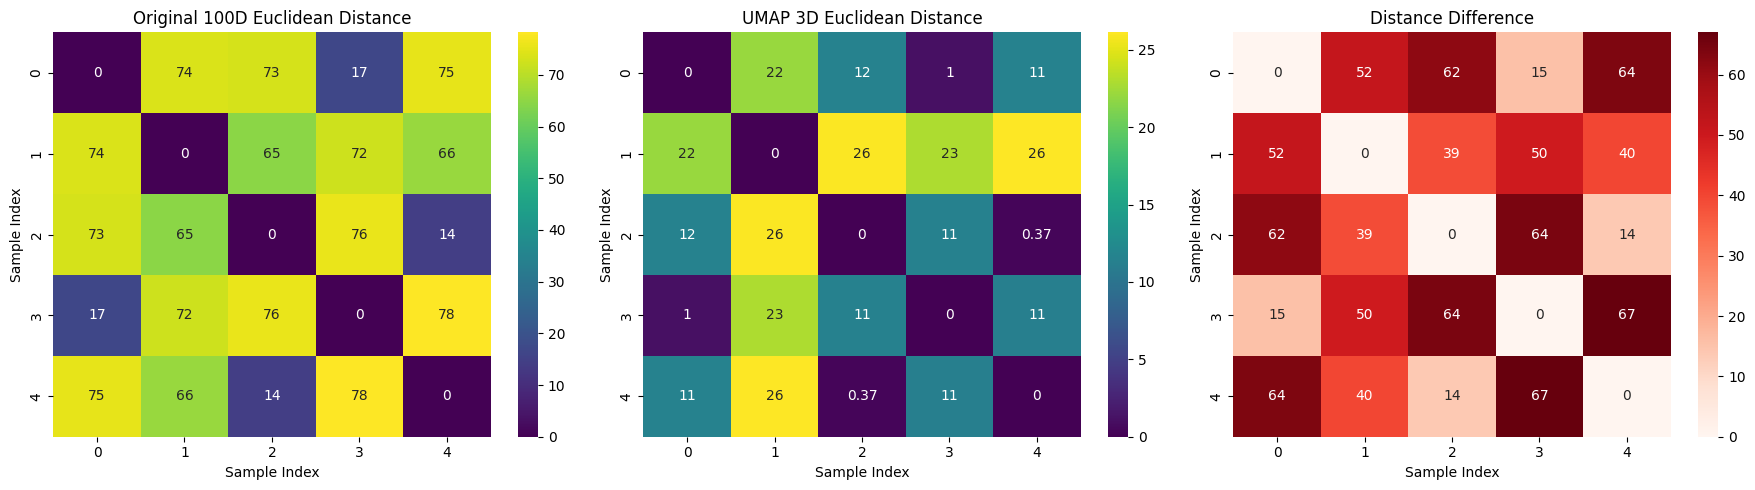

In [16]:
# 计算降维前后的向量距离变化（欧几里得距离）
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 选择前 5 个样本进行比较（可调整）
sample_indices = rng.choice(n_samples, size=5, replace=False)
X_sample = X[sample_indices]
X_umap_sample = X_umap3[sample_indices]

# 计算原始 100 维向量的欧几里得距离
dist_original = euclidean_distances(X_sample)
print("原始 100 维向量的欧几里得距离矩阵：")
print(dist_original)

# 计算 UMAP 降维后 3 维向量的欧几里得距离
dist_umap = euclidean_distances(X_umap_sample)
print("\nUMAP 降维后 3 维向量的欧几里得距离矩阵：")
print(dist_umap)

# 计算距离差异（绝对差值）
dist_diff = np.abs(dist_original - dist_umap)
print("\n距离差异矩阵（原始 - UMAP）：")
print(dist_diff)

# 计算平均距离差异（非对角线）
avg_dist_diff = np.mean(dist_diff[np.triu_indices_from(dist_diff, k=1)])
print(f"\n平均距离差异（非对角线）：{avg_dist_diff:.4f}")
print("差异越小，表示降维后距离保留得越好。")

# 可视化距离矩阵
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 原始距离 heatmap
sns.heatmap(dist_original, annot=True, cmap='viridis', ax=axes[0])
axes[0].set_title('Original 100D Euclidean Distance')
axes[0].set_xlabel('Sample Index')
axes[0].set_ylabel('Sample Index')

# UMAP 距离 heatmap
sns.heatmap(dist_umap, annot=True, cmap='viridis', ax=axes[1])
axes[1].set_title('UMAP 3D Euclidean Distance')
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Sample Index')

# 距离差异 heatmap
sns.heatmap(dist_diff, annot=True, cmap='Reds', ax=axes[2])
axes[2].set_title('Distance Difference')
axes[2].set_xlabel('Sample Index')
axes[2].set_ylabel('Sample Index')

plt.tight_layout()
plt.show()